# Live plotting examples with jupyerplot package

jupyter plot github page can be found [here](https://github.com/lvwerra/jupyterplot)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import time
from statistics import mean
from jupyterplot import ProgressPlot
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#basic demo from jupyterplot
pp1 = ProgressPlot()
for i in range(1000):
     pp1.update(np.sin(i / 100))
pp1.finalize()

In [2]:
#loading data 
rawC = np.loadtxt('data/raw_C.txt')

#create new transposed array
flip = np.transpose(rawC) #transposing 2d array so each row/list represents a frame
len(flip) #checking length is 2878 (number of frames)

#calculating mean (excluding 0s) of each row/frame
mean_per_frame = []
for r in flip:
    mean_per_frame.append(mean(c for c in r if c!=0))

#list for frames
frames = np.arange(2878)

#creating dict of frames and mean activity
dict = {float(frames[i]): float(mean_per_frame[i]) for i in range(len(frames))}

2878

In [17]:
#live updating plot with neural data
pp2 = ProgressPlot(x_label="frames",
                  line_names=["mean neural activity"],
                  x_lim=[0, 2878],
                  y_lim=[0,4],
                  plot_names=["'live' neural data"],
                  width=800,
                  height=400,
                  line_colors=["purple"])
for i in range(2878):
    pp2.update(float(mean_per_frame[i]))
    #pp2.x_lim(0,i)
pp2.finalize()
fig1 = plt.gcf()
#plt.show()
plt.draw()
fig1.savefig('live_line_plot2.png', dpi=300)

<Figure size 432x288 with 0 Axes>

In [5]:
#create matrix with frames and stim
np.random.seed(3)

#stim = np.random.randint(low=0, high=8, size=2878, dtype=int)
#matrix1 = np.column_stack((frames, stim))
#matrix2 = [[frames[i], stim[i]] for i in range(len(frames))]

sum(rawC[1, 10:19])

stims = []
#for i in range(len(frames)):
for i in range(144):
    randNum = np.random.randint(low=0,high=8, dtype=int)
    for a in range(10):
        stims.append(randNum)
    for b in range(10):
        stims.append(np.nan)
# stims = np.array(stims)
# for values in 
#     stims = stims.astype(int)
stims = stims[:-2]
# print(stims[0:21])

#matrix = np.column_stack((frames, stims)) #not working bc stims doesn't convert to array and keep int type


12.204587817192078

<Figure size 576x432 with 0 Axes>

(0.0, 160.0)

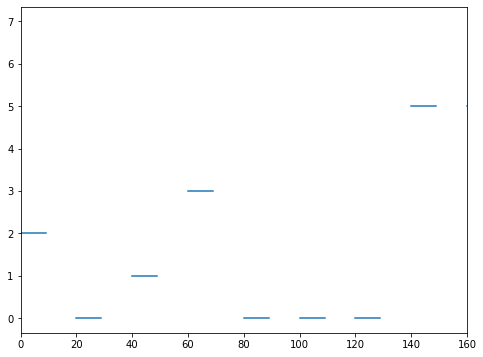

In [6]:
#visualizing example
plt.figure(figsize=(8,6))
plt.plot(frames,stims)
plt.xlim(0,160)

,frame,stims,sum of activity
0,0,2.0,40.538073
1,1,2.0,42.020654
2,2,2.0,39.035498
3,3,2.0,37.133739
4,4,2.0,39.437638
...,...,...,...
2873,2873,NaN,783.286746
2874,2874,NaN,801.678982
2875,2875,NaN,840.635482
2876,2876,NaN,862.065781


,sum of activity
stims,
0.0,421.125025
1.0,404.788008
2.0,372.591544
3.0,370.110032
4.0,474.146047
5.0,386.133503
6.0,372.065907
7.0,436.116618


[Text(0.5, 1.0, 'Mean population activity for each stimuli'),
 Text(0.5, 0, 'stimuli'),
 Text(0, 0.5, 'Mean population activity')]

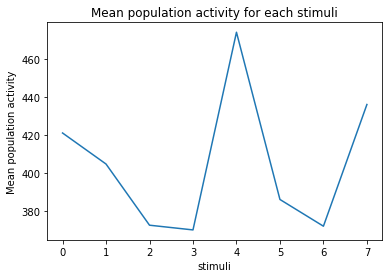

In [7]:
sum_per_frame = list(map(sum, flip)) #creates sum of all items (neurons) for each row (frame)

df = pd.DataFrame(
    {"frame": frames,
        "stims": stims,
        "sum of activity": sum_per_frame
    })
df

mean_activity_per_stim = df.groupby(['stims'])['sum of activity'].mean()
pd.DataFrame(mean_activity_per_stim)

linegraph = mean_activity_per_stim.plot()
linegraph.set(title = "Mean population activity for each stimuli",
           xlabel = "stimuli",
           ylabel = "Mean population activity")

Text(0.5, 1.0, 'Mean population activity for each stimuli')

[Text(0.5, 1.0, 'Mean population activity for each stimuli'),
 Text(0.5, 0, 'stimuli'),
 Text(0, 0.5, 'Mean population activity')]

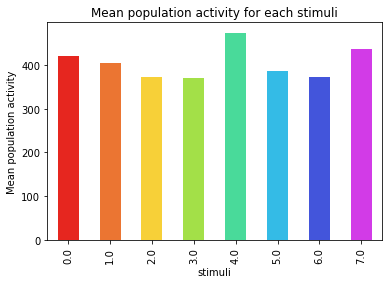

In [8]:
barplot = mean_activity_per_stim.plot.bar(color= 
                                          ['#e6261f',
                                           '#eb7532',
                                           '#f7d038',
                                           '#a3e048',
                                           '#49da9a',
                                           '#34bbe6',
                                           '#4355db',
                                           '#d23be7'])
barplot.set_title("Mean population activity for each stimuli")
barplot.set(title = "Mean population activity for each stimuli",
           xlabel = "stimuli",
           ylabel = "Mean population activity")

In [9]:
# plt.polar(mean_activity_per_stim['stims'].values,mean_activity_per_stim['sum of activity'].values)
# plt.show()

#type(mean_activity_per_stim)


polardata = pd.DataFrame({'stims':mean_activity_per_stim.index, 'sum of activity':mean_activity_per_stim.values})
polardata

#plt.polar(xs, ys)

,stims,sum of activity
0,0.0,421.125025
1,1.0,404.788008
2,2.0,372.591544
3,3.0,370.110032
4,4.0,474.146047
5,5.0,386.133503
6,6.0,372.065907
7,7.0,436.116618


stims
0.0    421.125025
1.0    404.788008
2.0    372.591544
3.0    370.110032
4.0    474.146047
5.0    386.133503
6.0    372.065907
7.0    436.116618
Name: sum of activity, dtype: float64

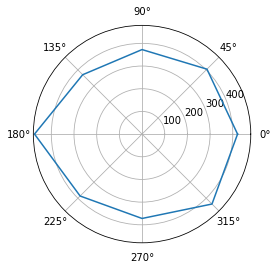

In [10]:
mean_activity_per_stim
wrapped_means = np.append(mean_activity_per_stim, mean_activity_per_stim[0])

theta = np.arange(0,361,45)*np.pi/180

plt.polar(theta,wrapped_means)